In [1]:
import pickle
from scipy import sparse
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import spektral
import os
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import keras_tuner as kt
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import openpyxl

In [5]:
batch = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\3rd informal\fan speed plot.xlsx")
print(batch)

    time(s)  T_outer wall  T_inner wall  T_air  T_water    T_model        se  \
0      0.00          44.9          71.4   22.4     71.3  71.300000  0.000000   
1     91.46          41.9          71.1   22.4     70.7  70.453107  0.060956   
2    129.88          42.3          70.8   22.5     70.3  70.104190  0.038342   
3    180.03          42.0          70.3   22.6     69.9  69.653718  0.060655   
4    239.95          42.3          69.7   22.6     69.4  69.118219  0.079401   
5    300.35          40.6          69.1   22.3     68.7  68.567870  0.017458   
6    360.03          39.6          68.6   22.5     67.9  68.056703  0.024556   
7    428.30          42.9          67.9   22.7     67.6  67.482172  0.013883   
8    480.28          40.9          67.4   21.7     67.1  66.952063  0.021885   
9    540.96          42.6          67.1   21.9     66.5  66.450208  0.002479   
10   600.33          42.9          66.4   22.5     66.0  66.012833  0.000165   
11   660.01          40.3          66.0 

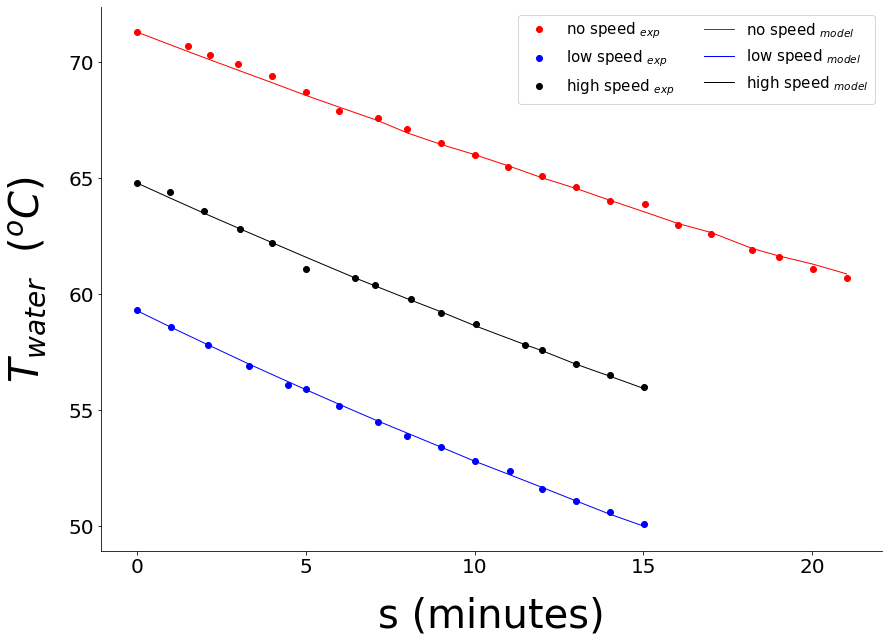

In [17]:
fig, ax1 = plt.subplots(figsize = (14, 10))
#total flux at permeate
n = 1
lw = 1
lw1 = 6
k1 = 0.026658
k2 = 0.047736
k3 = 0.0383528

ax1.plot(batch["time(s)"]/60,batch["T_water"],'ro', markersize = lw1,label = "no speed $_{exp}$")
ax1.plot(batch["time(s).1"]/60,batch["T_water.1"],'bo', markersize = lw1,label = "low speed $_{exp}$")
ax1.plot(batch["time(s).2"]/60,batch["T_water.2"],'ko', markersize = lw1,label = "high speed $_{exp}$")

ax1.plot(batch["time(s)"]/60,batch["T_model"],'r-', linewidth = lw,label = "no speed $_{model}$")
ax1.plot(batch["time(s).1"]/60,batch["T_model.1"],'b-', linewidth = lw,label = "low speed $_{model}$")
ax1.plot(batch["time(s).2"]/60,batch["T_model.2"],'k-', linewidth = lw,label = "high speed $_{model}$")
#ax2.plot(batch["feed flow (sccm)"],batch["N2 (ret)"],'bo', markersize = lw)


#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

legend = plt.legend(ncol = 2, loc = 'best', fontsize = 15)
ax1.set_ylabel(r"$ T_{water}$  $(^oC)$", fontsize = 40,labelpad=20)
#ax2.set_ylabel(r" N2% recovery", fontsize = 20, labelpad = 20, color = 'b')
ax1.set_xlabel(r"s (minutes)",fontsize = 40,labelpad=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
#ax2.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')